In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import resource
from datetime import datetime
import json

## Run times analyis

In [2]:
DATA_FOLDER = "../saved_ll/"

In [14]:
def plot(data, filename, total_runs):
    
    barWidth = 0.25
    
    # set height of bar
    min_time = [data[filename][total_runs][date]["min"] for date in data[filename][total_runs]]
    avg_time = [data[filename][total_runs][date]["avg"] for date in data[filename][total_runs]]
    std_time = [data[filename][total_runs][date]["std"] for date in data[filename][total_runs]]

    print(min_time)
    print(avg_time)
    
    # Set position of bar on X axis
    r1 = np.arange(len(min_time))
    r2 = [x + barWidth for x in r1]
    
    # Make the plot
    plt.bar(r1, min_time, color='red', width=barWidth, edgecolor='white', label='min')
    plt.bar(r2, avg_time, color='blue', width=barWidth, edgecolor='white', label='avg', yerr=std_time)

    # Add xticks on the middle of the group bars
    plt.xlabel('date', fontweight='bold')
    plt.xticks([r + barWidth/2 for r in range(len(min_time))], [date for date in data[filename][total_runs]])
    plt.ylabel('runtime (seconds)')
    # plt.ylim(0.43, 0.46)
    plt.title(f"runtime with {total_runs} executions")

    # Create legend & Show graphic
    plt.legend()
    plt.show()



In [6]:
def time_file(file, total_runs):
    subprocess.run(["clang-7", 
                        "-o", "res", 
                        file, 
                        "-mllvm", "-enable-misched=false",
                        "-lm",
                        ])
    pid = os.getpid()
    os.sched_setaffinity(pid, {0})
    times = []
    for i in range(total_runs):
        usage_start = resource.getrusage(resource.RUSAGE_CHILDREN)
        subprocess.run(["./res"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        usage_end = resource.getrusage(resource.RUSAGE_CHILDREN)
        times.append(usage_end.ru_utime - usage_start.ru_utime)
        
    min_time = min(times)
    avg_time = np.mean(times)
    std_time = np.std(times)
    os.sched_setaffinity(pid, {0, 1, 2, 3})
    subprocess.run(["rm", "res"])
    
    return {"min": min_time, "avg": avg_time, "std": std_time}

In [4]:
# run_times = {file: {} for file in os.listdir(DATA_FOLDER)}
with open("data.json", "r") as read_file:
    run_times = json.load(read_file)

In [19]:
total_runs = 30
for file in run_times:
    if file == '0.484.ll':
        res = time_file(f"{DATA_FOLDER}{file}", total_runs)
        now = datetime.now()
        date = now.strftime("%d/%m %H:%M")
        if str(total_runs) in run_times[file]: 
            run_times[file][str(total_runs)][date] = res
        else:
            run_times[file][str(total_runs)] = {}
            run_times[file][str(total_runs)][date] = res
                
# save        
with open('data.json', 'w') as fp:
    json.dump(run_times, fp)

[0.43481199999999376, 0.4993259999999964, 0.4466330000000198, 0.454780999999997, 0.44331099999999424]
[0.5074466666666714, 0.5746243333333325, 0.4488153333333382, 0.5086263333333344, 0.45147133333333045]


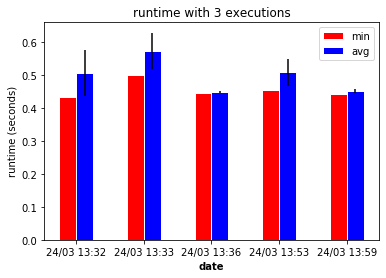

In [5]:
plot(run_times, '0.484.ll', '3')

[0.4408209999999997, 0.4405619999999999, 0.4392750000000092, 0.4432369999999537, 0.4370059999999967]
[0.4976353999999986, 0.4736331000000007, 0.4681241, 0.4694623999999976, 0.4888475999999969]


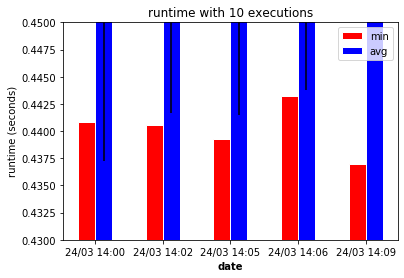

In [11]:
plot(run_times, '0.484.ll', '10')

[0.43781799999999294, 0.43839700000000903, 0.4310120000000097, 0.4353629999999953, 0.43552999999997155]
[0.4755651499999999, 0.47311935000000177, 0.4552651999999995, 0.4835758999999996, 0.4699117000000001]


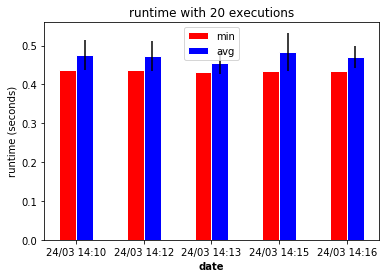

In [15]:
plot(run_times, '0.484.ll', '20')

[0.43118199999999973, 0.4294409999999971, 0.4303390000000036, 0.42725300000000743]
[0.4682617, 0.4580908999999996, 0.44995343333333343, 0.4517572666666666]


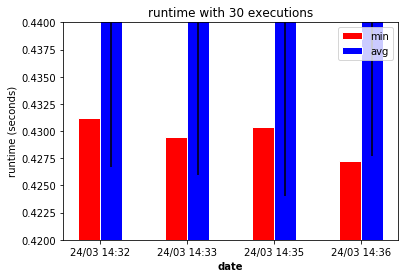

In [20]:
plot(run_times, '0.484.ll', '30')